<a href="https://colab.research.google.com/github/mbure/dslabs/blob/master/taxi_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

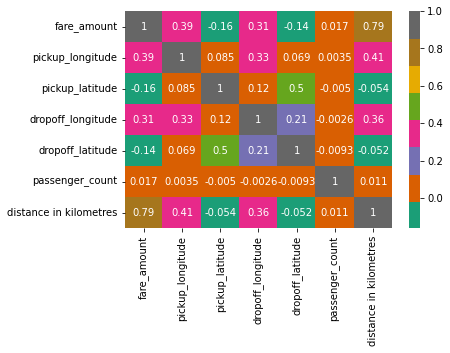

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import math
uploaded=files.upload()
taxif=pd.read_csv('train.csv')
# datapreprocessing and cleaning
taxif.drop('key',axis=1,inplace=True)
taxif.head()
taxif.describe()
taxif.shape
taxif=taxif[taxif['fare_amount']>0]
taxif.duplicated().sum()
taxif.isnull().sum()
taxif=taxif[taxif['passenger_count']>0]
taxif.shape
taxif.describe()
# removing coordinates not within New York
taxif = taxif[taxif['pickup_longitude'] <= -71.4725]
taxif= taxif[taxif['pickup_longitude'] >= -79.4554]

taxif = taxif[taxif['pickup_latitude'] <= 45.0042]
taxif= taxif[taxif['pickup_latitude'] >= 40.2940]

taxif= taxif[taxif['dropoff_longitude'] <= -71.4725]
taxif =taxif[taxif['dropoff_longitude'] >= -79.4554]

taxif= taxif[taxif['dropoff_latitude'] <= 45.0042]
taxif= taxif[taxif['dropoff_latitude'] >= 40.2940]
taxif.shape
# calculating distance travelled
def haversine(pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude ):
    earth_radius = 6371
    pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude = map(math.radians, [pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude])
    lat_diff = dropoff_latitude - pickup_latitude
    lon_diff = dropoff_longitude - pickup_longitude
    
    a = pow(math.sin(lat_diff/2), 2) + math.cos(pickup_latitude) * math.cos(dropoff_latitude) * pow(math.sin(lon_diff/2), 2)
    c = 2 * math.asin(math.sqrt(a))
    dist = earth_radius * c
    
    return dist
distances_array = []

for i in range(taxif.shape[0]):
    pick_lon = taxif.iloc[i]['pickup_longitude']
    pick_lat = taxif.iloc[i]['pickup_latitude']
    drop_lon = taxif.iloc[i]['dropoff_longitude']
    drop_lat = taxif.iloc[i]['dropoff_latitude'] 
    distances = haversine(pick_lon, pick_lat, drop_lon, drop_lat)
    distances_array.append(distances)
    
taxif['distance in kilometres'] = distances_array
taxif
taxif.describe()
taxif=taxif[taxif['distance in kilometres']>0]
# checking for correlation
corr_matrix=taxif.corr()
# data visualization

sns.heatmap(corr_matrix,annot=True,cmap='Dark2')






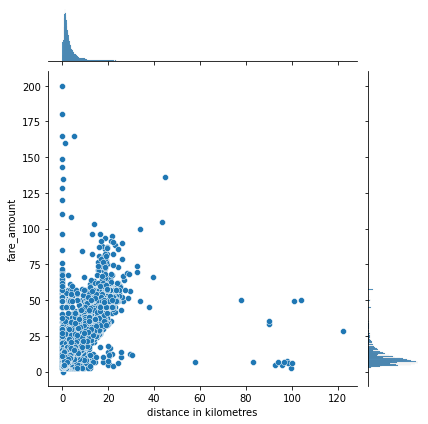

In [ ]:
sns.jointplot(x='distance in kilometres', y='fare_amount',data=taxif,kind='scatter')

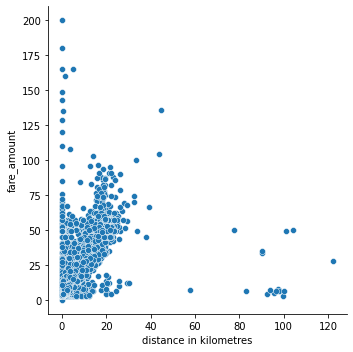

In [ ]:
sns.relplot(data=taxif,x='distance in kilometres',y='fare_amount')

In [ ]:
# data modelling
x=taxif['distance in kilometres'].to_frame()
y=taxif['fare_amount']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#creating our first model
#import model and import metrics
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#creating a model
#instance our model
linear=LinearRegression()
#train 
linear.fit(x_train,y_train)
#test the model
predictions=linear.predict(x_test)
#evaluate
error=mean_squared_error(y_test, predictions)
err=mean_absolute_error(y_test,predictions)
print(error)
print(err)



34.93767479714931
2.7485870306497207


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


NameError: ignored

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000
75%,12.500000,-73.967145,40.767365,-73.963619,40.768163,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000,49826.000000
mean,11.373050,-72.510586,39.934185,-72.506925,39.927466,1.673424
std,9.693572,10.391352,6.225261,10.400046,6.011749,1.287790
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980086,40.753376,1.000000
75%,12.500000,-73.967145,40.767365,-73.963619,40.768163,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000
